## Import the required Libraries

In [1]:
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


## Initiate the Model

In [2]:
classifier = VGG16()
print(classifier.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

## Load the Image

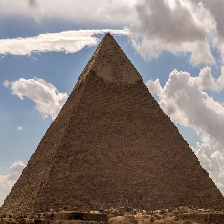

In [3]:
new_image= image.load_img('D:/pyramid.jpeg', target_size=(224, 224))
new_image

## Change the image to array

In [4]:
transformed_image= image.img_to_array(new_image)
transformed_image.shape


(224, 224, 3)

## Expand the tranfromed image with 4th Dimension

In [5]:
transformed_image=np.expand_dims(transformed_image,axis=0)
transformed_image.shape

(1, 224, 224, 3)

## Preprocess the Image

In [6]:
transformed_image=preprocess_input(transformed_image)
transformed_image

array([[[[ 97.061   ,  86.221   ,  89.32    ],
         [ 96.061   ,  85.221   ,  88.32    ],
         [ 97.061   ,  86.221   ,  89.32    ],
         ...,
         [ 58.060997,  44.221   ,  46.32    ],
         [ 60.060997,  46.221   ,  49.32    ],
         [ 62.060997,  48.221   ,  51.32    ]],

        [[ 96.061   ,  86.221   ,  87.32    ],
         [103.061   ,  93.221   ,  94.32    ],
         [101.061   ,  91.221   ,  92.32    ],
         ...,
         [ 53.060997,  39.221   ,  41.32    ],
         [ 54.060997,  40.221   ,  43.32    ],
         [ 56.060997,  42.221   ,  45.32    ]],

        [[ 90.061   ,  79.221   ,  80.32    ],
         [ 93.061   ,  82.221   ,  83.32    ],
         [ 97.061   ,  86.221   ,  87.32    ],
         ...,
         [ 53.060997,  39.221   ,  41.32    ],
         [ 53.060997,  39.221   ,  42.32    ],
         [ 55.060997,  41.221   ,  44.32    ]],

        ...,

        [[-64.939   , -52.779   , -33.68    ],
         [-79.939   , -67.779   , -48.68    ]

## Create a predictor variable

In [7]:
y_pred= classifier.predict(transformed_image)
y_pred

array([[6.13451618e-08, 9.75525950e-07, 4.23466957e-07, 5.22295409e-07,
        2.26427446e-07, 4.08960545e-07, 8.66295579e-07, 1.99088731e-06,
        9.83872042e-07, 1.87045271e-06, 9.84587359e-07, 8.44672172e-08,
        1.31816194e-06, 4.18820719e-06, 4.55754019e-07, 2.52440918e-06,
        3.59976610e-07, 3.55078873e-06, 6.29364467e-06, 4.82221765e-07,
        5.24750067e-06, 4.71067506e-06, 5.39780331e-06, 1.63588666e-05,
        2.44527882e-06, 4.22415205e-08, 2.27910576e-07, 1.11375300e-06,
        1.03393978e-08, 1.13393249e-07, 2.39346463e-07, 1.01789595e-07,
        9.19396754e-08, 3.22333079e-07, 5.48555772e-06, 1.41607882e-06,
        8.38057701e-07, 3.51283305e-08, 1.58944644e-07, 7.19306399e-07,
        3.76838727e-07, 6.94572506e-08, 3.25316455e-06, 5.40365409e-06,
        6.90626905e-07, 2.25816081e-07, 3.57748632e-07, 3.28104562e-07,
        7.43478097e-08, 1.68728732e-07, 4.62492039e-07, 1.85900024e-06,
        5.65942315e-08, 7.96408699e-08, 2.39774499e-06, 2.325006

## Check the shape of the array

In [8]:
y_pred.shape

(1, 1000)

## Make the predictions

In [9]:
from keras.applications.vgg16 import decode_predictions
decode_predictions(y_pred,top=5)

[[('n02793495', 'barn', 0.27790722),
  ('n03028079', 'church', 0.25305647),
  ('n02825657', 'bell_cote', 0.13496666),
  ('n03837869', 'obelisk', 0.07406475),
  ('n09193705', 'alp', 0.05210917)]]

# Make the predictions in readable form

In [10]:
label = decode_predictions(y_pred)
# retrieve the most likely result, i.e. highest probability
decoded_label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

barn (27.79%)
